## Scaling and Standarization




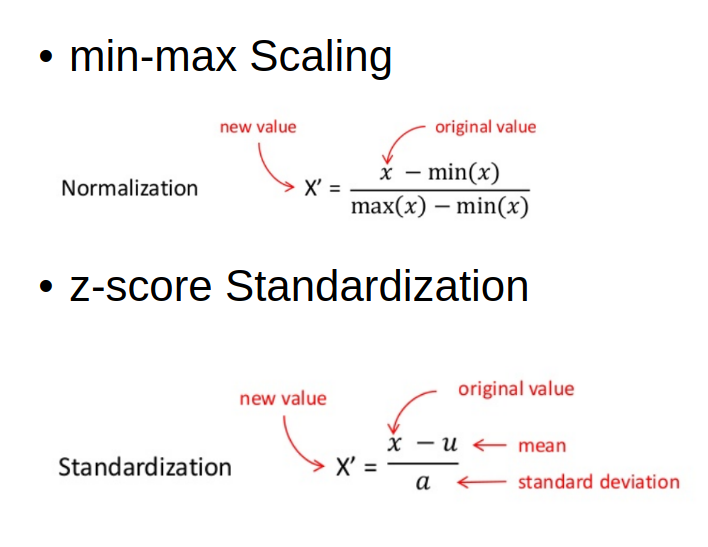

In [2]:
import numpy as np
X=np.array([6 , 2, 7, 5, 0, 4, 2, 4 ,9,10])
print(X)
# MinMax scaling 
X_scaled=(X-min(X))/(max(X)-min(X))
print(X_scaled)
# Standardization
mu=np.mean(X) 
std= np.std(X)
X_stand=(X-mu)/std
print(X_stand)

[ 6  2  7  5  0  4  2  4  9 10]
[0.6 0.2 0.7 0.5 0.  0.4 0.2 0.4 0.9 1. ]
[ 0.36484697 -0.96186928  0.69652603  0.03316791 -1.62522741 -0.29851116
 -0.96186928 -0.29851116  1.35988416  1.69156322]


In [3]:
import numpy as np
X=np.random.randint(1,100,500)
#print(X)
# MinMax scaling 
X_scaled=(X-min(X))/(max(X)-min(X))
#print(X_scaled)
# Standardization
mu=np.mean(X) 
std= np.std(X)
X_stand=(X-mu)/std
#print(X_stand)

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns




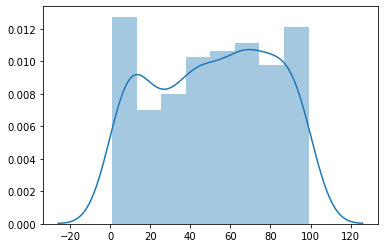

In [5]:
sns.distplot(X)

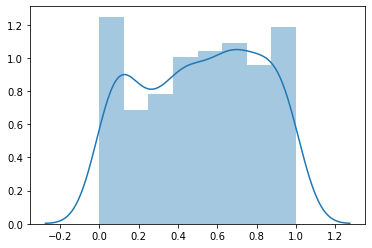

In [6]:
sns.distplot(X_scaled)

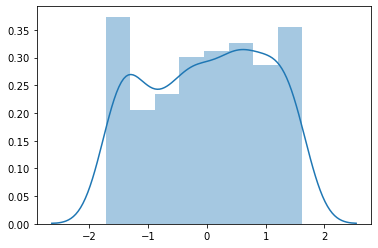

In [7]:
sns.distplot(X_stand)

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Data= pd.DataFrame(np.array([[ 1., -1.,  2.],
                             [ 2.,  0.,  0.],
                             [ 0.,  1., -1.]]),columns=['A','B','C'])

min_max_scaler = MinMaxScaler()
Stand= StandardScaler()

Data_MinMax= pd.DataFrame(min_max_scaler.fit_transform(Data),columns=['A','B','C'])

Data_Stand= pd.DataFrame(Stand.fit_transform(Data),columns=['A','B','C'])

Data

,A,B,C
0,1.0,-1.0,2.0
1,2.0,0.0,0.0
2,0.0,1.0,-1.0


In [9]:
Data_MinMax

,A,B,C
0,0.5,0.0,1.000000
1,1.0,0.5,0.333333
2,0.0,1.0,0.000000


In [10]:
Data_Stand

,A,B,C
0,0.000000,-1.224745,1.336306
1,1.224745,0.000000,-0.267261
2,-1.224745,1.224745,-1.069045


**Linear Regression**

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Creat Data set 

X=np.random.rand(1,1000)
Alpha1=7
Alpha0=1
y= Alpha1*X+ Alpha0 + 0.02*np.random.randn(1,1000)

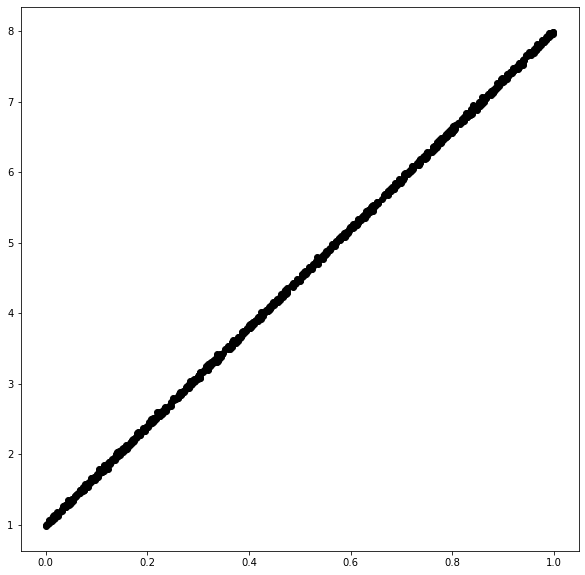

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(X, y,  color='black')


In [20]:


# Split the data into training/testing sets
X_train = X[0,:-200].reshape(-1, 1)
X_test = X[0,-200:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y[0,:-200].reshape(-1, 1)
y_test = y[0,-200:].reshape(-1, 1)


In [21]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)


LinearRegression()

In [22]:
regr.coef_

array([[6.99773847]])

In [23]:
regr.intercept_

array([1.00075434])

Coefficients: 
 [[6.99773847]]
Mean squared error: 0.0004207756063418003
Coefficient of determination: 0.9999018313804268


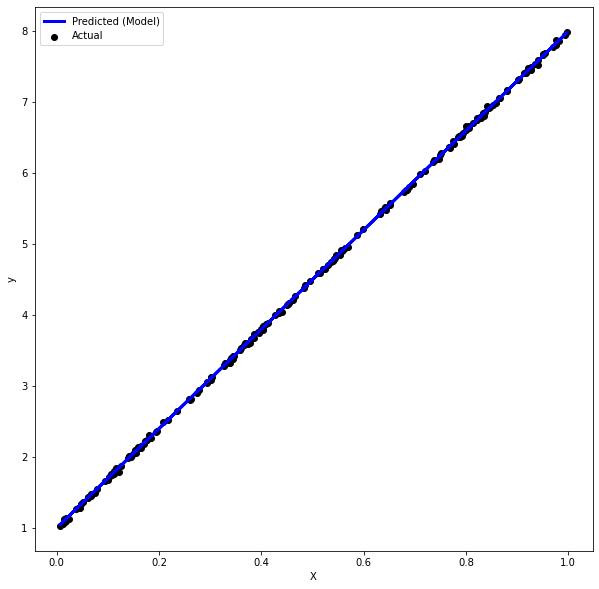

In [24]:



# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print(f'Mean squared error: {mean_squared_error(y_test,y_pred)}')
    
# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination: {r2_score(y_test, y_pred)}')

# Plot outputs

plt.figure(figsize=(10,10))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('X')
plt.ylabel('y')

plt.legend(['Predicted (Model)','Actual'])

plt.show()

## Classification : KNN algorithm


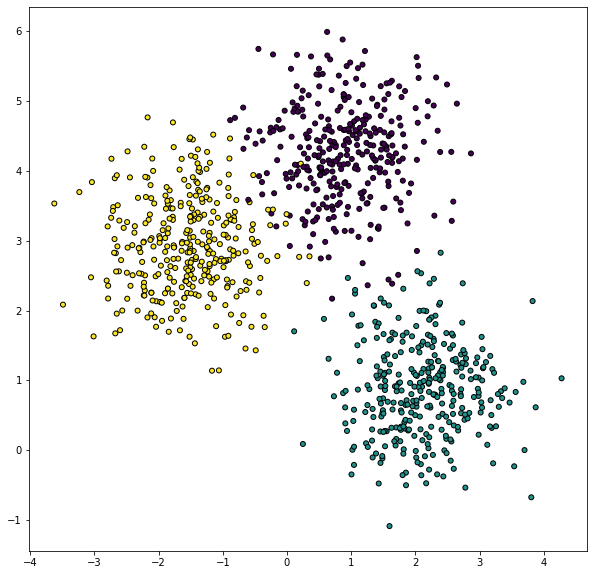

In [26]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=1000, cluster_std=0.7,centers=3, n_features=2,   random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')



In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
for k in [3,4,5,7,9,11,13,15]:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)

    y_pred=KNN.predict(X_test)

    print(f'k= {k} ---> Accuracy score = {accuracy_score(y_test,y_pred)*100} %')
    

# predecting an example 
# print(KNN.predict([[0,1]]))
#print(KNN.predict_proba([[0,1]]))


k= 3 ---> Accuracy score = 97.27272727272728 %
k= 4 ---> Accuracy score = 98.18181818181819 %
k= 5 ---> Accuracy score = 98.18181818181819 %
k= 7 ---> Accuracy score = 98.18181818181819 %
k= 9 ---> Accuracy score = 98.48484848484848 %
k= 11 ---> Accuracy score = 97.87878787878788 %
k= 13 ---> Accuracy score = 97.57575757575758 %
k= 15 ---> Accuracy score = 97.87878787878788 %


In [50]:
import time 


X, y = make_blobs(n_samples=1000000, cluster_std=0.7,centers=3, n_features=2,   random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
KNN = KNeighborsClassifier(n_neighbors=k)


KNN.fit(X_train, y_train)


start=time.time()

y_pred=KNN.predict(X_test)

end =time.time()


print(f'k= {k} ---> Accuracy score = {accuracy_score(y_test,y_pred)*100} %')

print(f'Prediction Time per sample  = {(end-start)/len(X_test)} sec')

k= 15 ---> Accuracy score = 98.16969696969697 %
Prediction Time per sample  = 2.8954231377803918e-05 sec


### Pickle your model and use it later 


In [13]:
import pickle

# save the model to disk
filename = 'KNN_mod.pkl'
pickle.dump(KNN, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
KNN_loaded = pickle.load(open(filename, 'rb'))

y_pred=KNN_loaded.predict(X_test)

print(f'Accuracy score = {accuracy_score(y_test,y_pred)*100} %')

# predecting an example with the loaded model 
print(KNN.predict([[0,1]]))
print(KNN.predict_proba([[0,1]]))


Accuracy score = 91.51515151515152 %
[2]
[[0. 0. 1.]]





## K-Means Clustering with scikit-learn


### Generate the samples

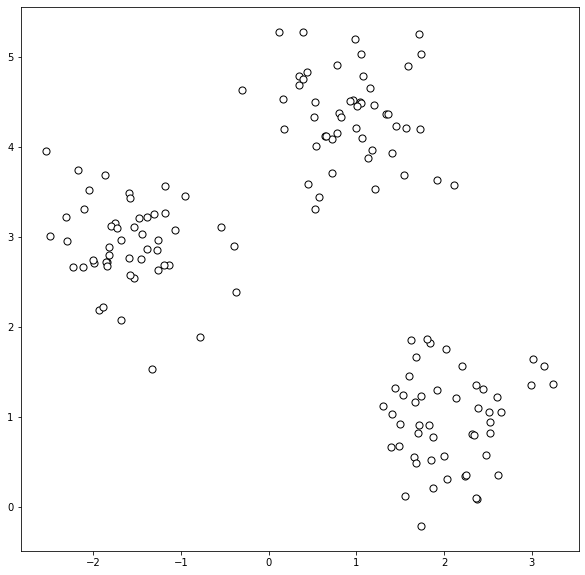

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)


# plot
plt.figure(figsize=(10,10))
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

### Build K-means model 

In [52]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

### Use the K-Means model to classify and visualize samples

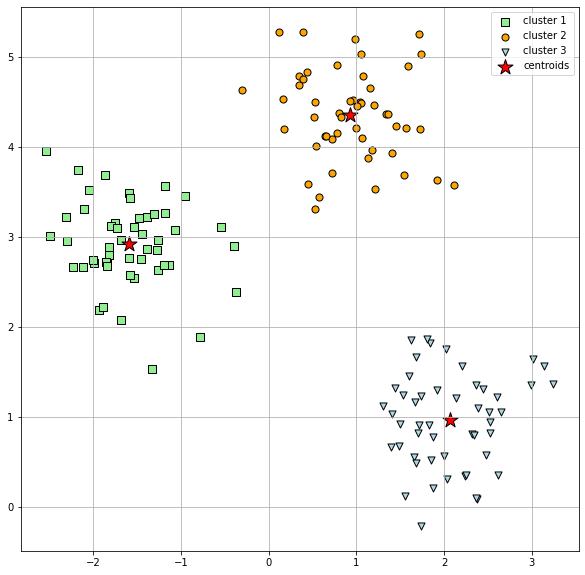

In [53]:
plt.figure(figsize=(10,10))

# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### Logistic Regression Examplem



In [44]:
# Logistic Regression
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)


In [45]:
dataframe.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [47]:
# Create X and y from DataFrame 
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]


In [48]:
# Split test and train 
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)


In [49]:
# Fit the model on training set
model = LogisticRegression()
model.fit(X_train, Y_train)


/home/ibrahim/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:

# Test model 
result = model.score(X_test, Y_test)
print(result)

0.7874015748031497


In [51]:
# save the model to disk
filename = 'model_saved.pkl'
pickle.dump(model, open(filename, 'wb'))



In [52]:
# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7874015748031497


## Excercises 



*   Use MinMax and compare the results 
*   Use z-score standardization and compare the results 
*   USE PCA and test the results 
*   Check if imbalnced problem is there 
*   Check other classification models for better accuracy 
*   Report confusion matrix
*   Provide correlation analysis 
*   Can you improve the accuracy of the model using any other way?

